<h3>I aim to create a Decision Tree that can accurately classify wines based on a number of metrics (alcohol content, magnesium content, etc.) in order to demonstate how Decision Trees are trained for use in classifying problems.</h3>

In [1]:
# Import necessary packages
# Our dataset
from sklearn.datasets import load_wine
# Pandas, for dataframes
import pandas as pd
# Numpy, for arrays
import numpy as np
# Sweetviz, for EDA
import sweetviz as sv
# Our decision tree model
from sklearn.tree import DecisionTreeClassifier
# Used for spliting dataset
from sklearn.model_selection import train_test_split
# Tree package
from sklearn import tree
# For printing our decision tree
import matplotlib.pyplot as plt

In [2]:
# Load the wine dataset
wine = load_wine()

In [3]:
# Create a dataframe for the inputs, with rows representing entries, and columns representing features
X = pd.DataFrame(wine.data, columns = wine.feature_names)
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [4]:
# Create a dataframe for the outputs
y = pd.DataFrame(wine.target, columns = ["Type"])
y

,Type
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


In [5]:
# Create a combined dataframe with both data and targets
data = np.c_[wine.data, wine.target]
cols = np.append(wine.feature_names, ["Type"])
wine_df = pd.DataFrame(data, columns = cols)

In [6]:
# Perform exploratory data analysis
report = sv.analyze(wine_df)

                                             |                                             | [  0%]   00:00 ->…

In [7]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<h3>The data has no missing values, and all parameters have fairly normally distributed data, thus we have no concerns about the data.</h3>

In [8]:
# Split the dataset
(X_train, X_vt, y_train, y_vt) = train_test_split(X, y, train_size=0.7, random_state=2)
(X_valid, X_test, y_valid, y_test) = train_test_split(X_vt, y_vt, train_size=0.5, random_state=2)

In [9]:
# Create a new decision tree, considering at most 12 features of the data, a maximum depth of 3 (not including the root),the
# minimum number of samples in each split being 10, and the minimum number of samples in each leaf node (the bottom row in each
# branch)
my_tree = DecisionTreeClassifier(max_features = 12, max_depth = 3, min_samples_split = 10, min_samples_leaf = 5, random_state = 2)
# Fit the decision tree on our training data
my_tree = my_tree.fit(X_train, y_train)

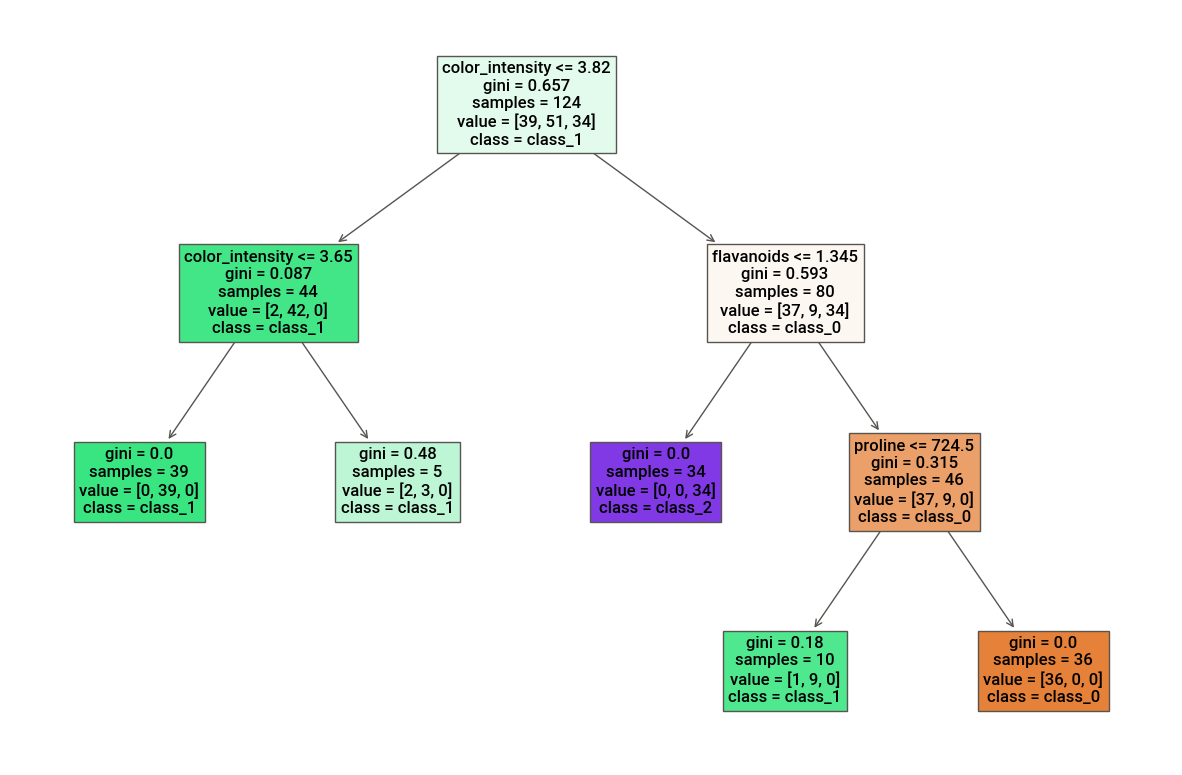

In [10]:
# Displaying our decision tree
fig = plt.figure(figsize = (15, 10))
_ = tree.plot_tree(my_tree,
                  feature_names = wine.feature_names,
                  class_names = wine.target_names,
                  filled = True,
                  fontsize = 12)

In [11]:
# Get the model accuracy on the training set
my_tree.score(X_train, y_train)

0.9758064516129032

<h3>The decision tree predicts the type of wine accurately ~97.6% of the time on the training set</h3>

In [12]:
# Get the model accuracy on the validation set
my_tree.score(X_valid, y_valid)

0.9259259259259259

<h3>The decision tree predicts the type of wine accurately ~92.6% of the time on the validation set</h3>

In [13]:
# Get the model accuracy on the test set
my_tree.score(X_test, y_test)

0.8888888888888888

<h3>The decision tree predicts the type of wine accurately ~88.9% of the time on the test set</h3>

<h3>The model has high accuracy across all the sets, but the accuracy varies by set, as desired. The fact that the model does not predict the types of the data from the training set perfectly (i.e. score of 1) indicates that we do not have overfitting in our model (which is good).</h3>

In [14]:
# Create a new decision tree with similar parameters, except the max depth will be 2, and we will only consider 8 features
my_tree2 = DecisionTreeClassifier(max_features = 8, max_depth = 2, min_samples_split = 10, min_samples_leaf = 5, random_state = 2)
my_tree2 = my_tree2.fit(X_train, y_train)

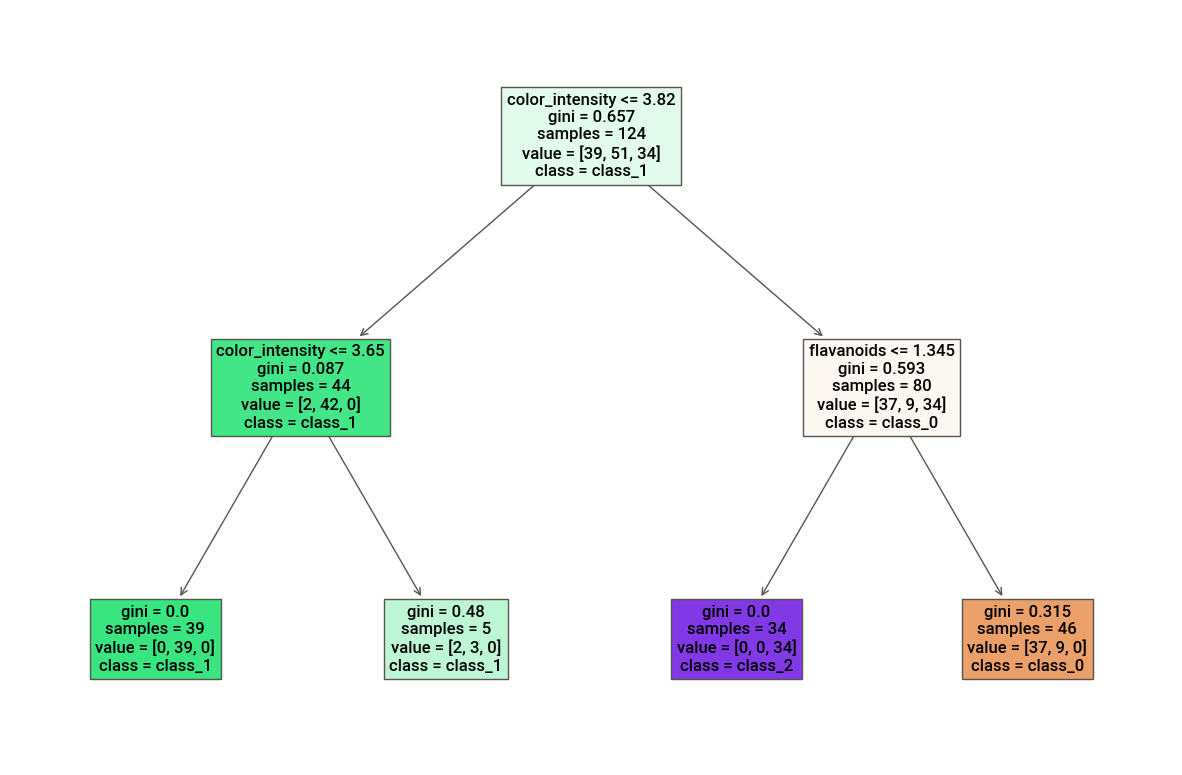

In [15]:
# Displaying our decision tree
fig = plt.figure(figsize = (15, 10))
_ = tree.plot_tree(my_tree2,
                  feature_names = wine.feature_names,
                  class_names = wine.target_names,
                  filled = True,
                  fontsize = 12)

In [16]:
# Get the model accuracy on the training set
my_tree2.score(X_train, y_train)

0.9112903225806451

<h3>The decision tree predicts the type of wine accurately ~91.1% of the time on the training set</h3>

In [17]:
# Get the model accuracy on the validation set
my_tree2.score(X_valid, y_valid)

0.8888888888888888

<h3>The decision tree predicts the type of wine accurately ~88.8% of the time on the validation set</h3>

In [18]:
# Get the model accuracy on the test set
my_tree2.score(X_test, y_test)

0.8518518518518519

<h3>The decision tree predicts the type of wine accurately ~85.2% of the time on the test set</h3>

<h3>Like the first model, this tree has fairly high accuracy across the data sets, and does not perform perfectly on the training data, so we are not overfitting. The model has a decrease in accuracy of ~4.6% overall, as well as a decrease in accuracy on the training set of ~6.5%, as compared to the first model. This model is less accurate, which can be expected from a less complex decision tree, but the increased simplicity could be worth the trade-off in accuracy, depending on what we are prioritizing from our Decision Tree. Overall, I believe the first model to be superior to the second.</h3>